<a href="https://colab.research.google.com/github/alekrul/RL/blob/main/ThompsomSamplingBeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function, division
from builtins import range

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [ ]:
NUM_TRIALS = 2000
BANDIT_PROBS = [0.2, 0.5, 0.75]

In [ ]:
class Bandit:
  def __init__(self,p):
    self.p = p
    self.a = 1
    self.b = 1
    self.N = 0
  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
    self.a += x
    self.b += 1 - x
    self.N += 1

In [ ]:
def plot_results(bandits, trial):
  x = np.linspace(0,1,200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x,y, label=f"real p: {b.p:.4f}, win rate = {b.a - 1}/{b.N}")
  plt.title(f"Bandit distributions after {trial} trials")
  plt.legend()
  plt.show()

In [ ]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBS]

  sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    j = np.argmax([b.sample() for b in bandits])

    if i in sample_points:
      plot_results(bandits,i)
    
    x = bandits[j].pull()

    rewards[i] = x

    bandits[j].update(x)
  print("total reward earned:", rewards.sum())
  print("Overall win rate:", rewards.sum()/NUM_TRIALS)
  print("Num times selected each bandit", [b.N for b in bandits])


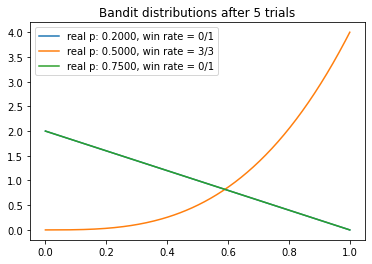

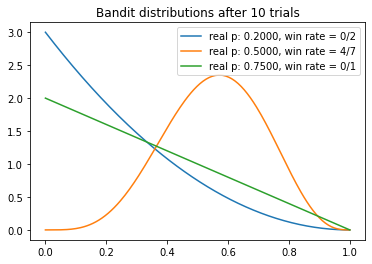

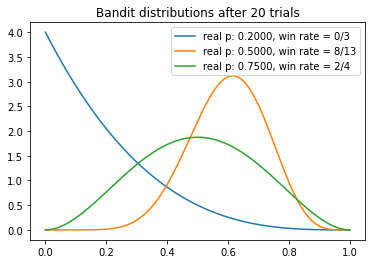

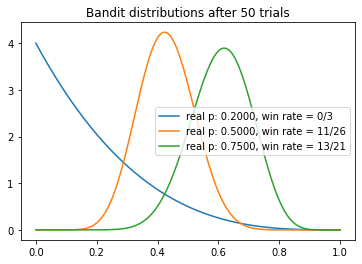

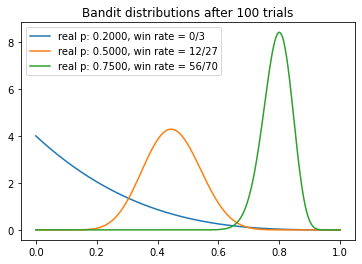

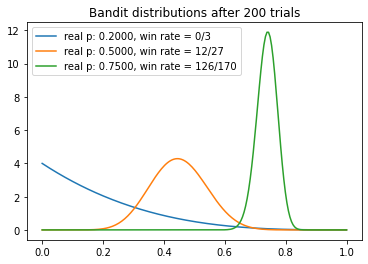

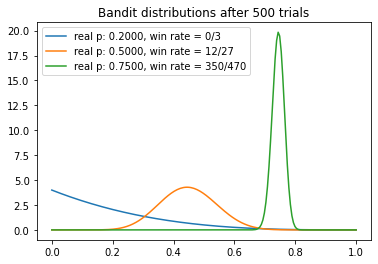

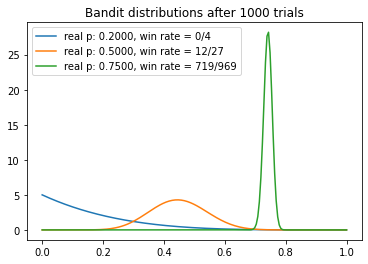

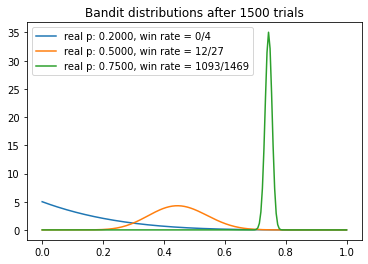

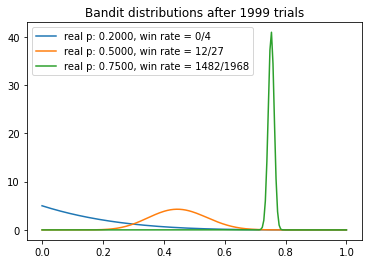

total reward earned: 1494.0
Overall win rate: 0.747
Num times selected each bandit [4, 27, 1969]


In [ ]:
experiment()